# Hands-on: the lighthouse problem (another unbinned ML fit)

A lighthouse is somewhere off a piece of straight coastline at a position $\alpha$ along the shore and a distance $\beta$ out at sea (see figure). Its lamp rotates with constant velocity but it is not on at all the times: it emits a series of short highly collimated flashes at random intervals and hence at random angles $\theta_k$. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. $N = 1000$ flashes have so far been recorded with positions $x_k$.
<img src="https://www.physi.uni-heidelberg.de/~reygers/lectures/2020/smipp-grk-2149/notebooks/problems/lighthouse.png" alt="Drawing" style="width: 500px;"/>

Our goal is to estimate the lighthouse position using the likelihood method.

This problem is discussed, e.g., in Sivia, Skilling, "Data Analysis: A Bayesian Tutorial".

Elementary geometry allows us to write

$$x_k(\theta_k) = \alpha + \beta\tan\theta_k$$

The angle $\theta$ is uniformly distributed between $-\pi/2$ and $\pi/2$. We obtain the pdf $p(x | \alpha, \beta)$ from a change of variables:

$$p(x | \alpha, \beta) = f(\theta(x))\left|\frac{d\theta}{dx}\right|, \quad f(\theta) = const.$$

$$\theta(x) = \tan^{-1}\left(\frac{x-\alpha}{\beta}\right), \quad \frac{d\theta}{dx} = \frac{\beta}{(x - \alpha)^2 + \beta^2}$$

In summary, the normalized pdf for measuring the light flash at position $x$ for given values $\alpha$ and $\beta$ is given by

$$ p(x | \alpha, \beta) = \frac{1}{\pi}\frac{\beta}{(x - \alpha)^2 + \beta^2} $$

This is known as Cauchy distribution, a distribution which neither has a mean nor a variance as the corresponding integrals diverge.

In [4]:
# Load the data on the recorded positions and plot their distribution as an histogram.
import pandas as pd
d = pd.read_csv('../data/lighthouse.csv')

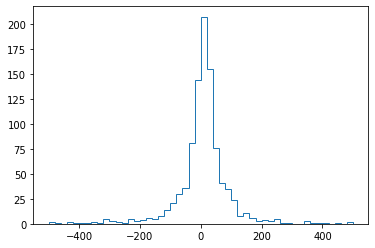

In [5]:
# plot the data
import matplotlib.pyplot as plt
plt.hist(d['xk'], bins=50, range=(-500, 500), histtype='step');

a) Define a python function that takes as input the values of $x_k$ (as a numpy array) and the parameters $\alpha$ and $\beta$ and returns the corresponding values of the probability density function.

In [6]:
import numpy as np
def p(x, alpha, beta):
    ### begin solution
    
    # your code here
    
    ### end solution
    return pdf_val

b) Now we would like to visualize the likelihood function for a given (small) number $n$ of measurements $x_k$. In the Bayesian view this is the posterior distribution. Plot the posterior distribution in a 2 x 2 panel plot for $n = 1, 2, 10, 50$.

In [7]:
def Ltmp(alpha, n):
    # n = number of data points (we arbitrarily start at data point 300)
    beta = 30
    pv = p(d['xk'][300:300+n], alpha, beta)
    return np.prod(pv)
L = np.vectorize(Ltmp) # make it usable for numpay arrays

In [8]:
# your code here

# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.tight_layout()

# av = np.linspace(-100., 100., 100)
# plt.subplot(2, 2, 1)
# plt.plot(av, L(av, 1), label='n = 1')
# plt.legend()

# ...


c) Now write a python function that returns the logarithm of the likelihood of the given dataset as a function of $\alpha$ and $\beta$.

In [9]:
def LL(alpha, beta):
    ### begin solution

    # your code here
    # data: d['xk']
    
    ### end solution
    return LogLikelihood

def NLL(alpha, beta):
    return -LL(alpha, beta)

d) Now we want to find the values of $\alpha$ and $\beta$ for which the logarithm of the likelihood is maximised. To do that we can use the `migrad` numerical minimiser from the package `iminuit`. Since this looks for the minimum rather than the maximum of the given function we will pass to it the negative logarithm of the likelihood `NLL` (defined by multiplying the logarithm of the likelihood by -1).

The basic usage of Minuit is described here: https://nbviewer.jupyter.org/github/scikit-hep/iminuit/blob/master/tutorial/basic_tutorial.ipynb

In [10]:
from iminuit import Minuit

# your code here



e) Plot the fitted pdf along with the data

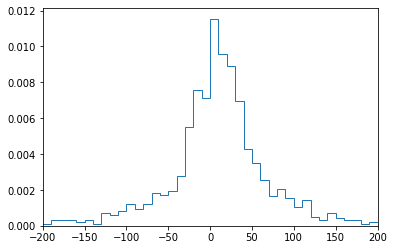

In [13]:
xs=np.linspace(-200,200,400)
plt.hist(d['xk'], bins=200, density=True, histtype='step', range=(-1000,1000));
plt.xlim(-200, 200);

# your code here
